# Zooplankton Grazing: Split 201905 Run, versus continuation of 2007 part into 2013-2014

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [50]:
oyears = ['2012', '2013', '2014', '2015']
nyears = ['2013', '2014']
years = ['2012', '2013', '2014', '2015']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
orig = {}
wrap = {}

imin, imax = 450, 500
jmin, jmax = 250, 300

In [61]:
meshfile = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
e3t = np.array(meshfile.e3t_0[0])
deptht = meshfile.gdept_1d[0]
iz = 26

In [77]:
def avariable(ax, variable):
    for year in oyears:
        orig[year] = np.zeros((12))
        for im, month in enumerate(months):
            origfile = xr.open_dataset(f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{year}{month}_{year}{month}_dia2_T.nc')
            orig[year][im] = (np.array(origfile[variable][0, 0:iz, imin:imax, jmin:jmax])
                              * e3t[0:iz, imin:imax, jmin:jmax]).sum(axis=0).mean(axis=0).mean(axis=0)
            colour = 'tab:blue'
            if int(year) < 2013:
                colour = 'tab:orange'
            origfile.close()
        ax.plot(int(year) + np.arange(12)/12, orig[year], c=colour, linewidth=3)
    for year in nyears:    
        wrap[year] = np.empty((12))
        for im, month in enumerate(months):
            if int(year) < 2014 or im < 10:
                wrapfile = xr.open_dataset(f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{year}{month}_{year}{month}_dia2_T.nc')
                wrap[year][im] = (np.array(wrapfile[variable][0, 0:iz, imin:imax, jmin:jmax])
                                  * e3t[0:iz, imin:imax, jmin:jmax]).sum(axis=0).mean(axis=0).mean(axis=0)
                wrapfile.close()
            else:
                wrap[year][im] = np.nan
        ax.plot(int(year) + np.arange(12)/12, wrap[year], c='tab:orange')

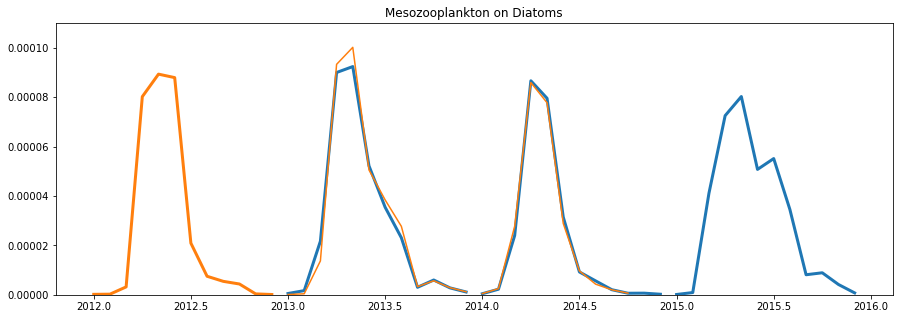

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
avariable(ax, 'GRMESZDIAT')
ax.set_ylim(0, 1.1e-4)
ax.set_title('Mesozooplankton on Diatoms');

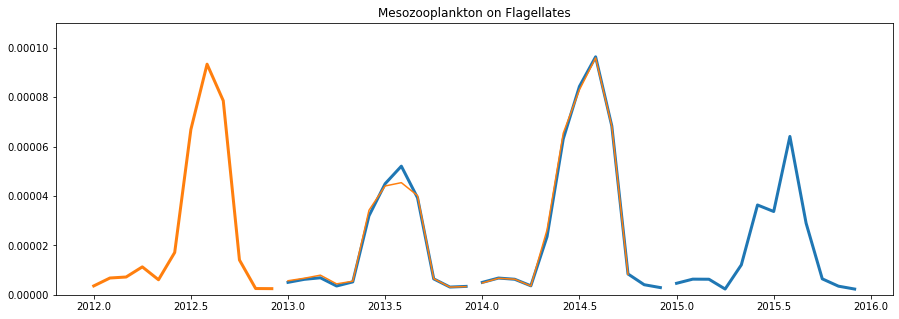

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
avariable(ax, 'GRMESZPHY')
ax.set_ylim(0, 1.1e-4)
ax.set_title('Mesozooplankton on Flagellates');

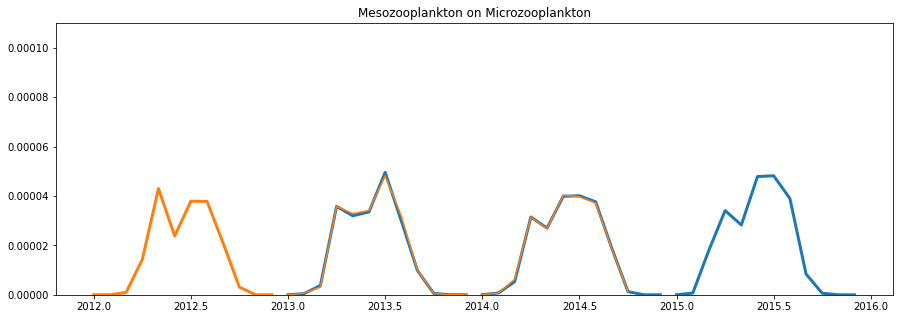

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
avariable(ax, 'GRMESZMICZ')
ax.set_ylim(0, 1.1e-4)
ax.set_title('Mesozooplankton on Microzooplankton');

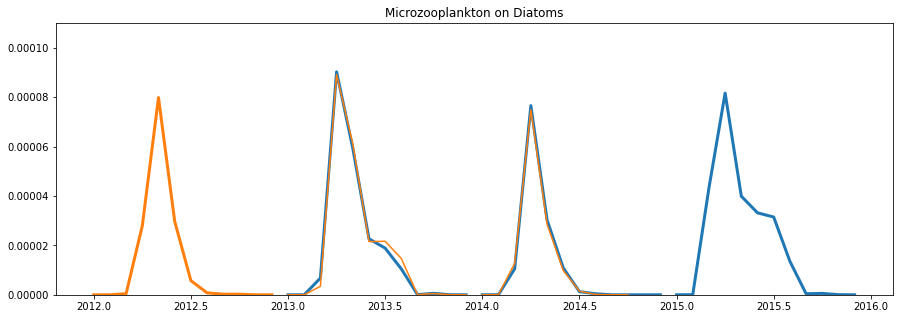

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
avariable(ax, 'GRMICZDIAT')
ax.set_ylim(0, 1.1e-4)
ax.set_title('Microzooplankton on Diatoms');

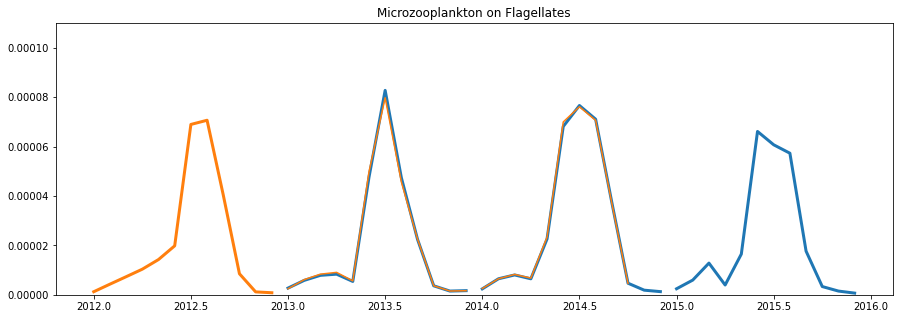

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
avariable(ax, 'GRMICZPHY')
ax.set_ylim(0, 1.1e-4)
ax.set_title('Microzooplankton on Flagellates');